# Задача 2. Линейная регрессия, метод градиентного спуска

* **Дедлайн**: 29.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [ ] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [ ] При обучении моделей использовать **масштабирование данных**.
- [ ] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [ ] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [ ] Повторить тоже самое, но используя **кросс-валидацию**.
- [ ] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [ ] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [ ] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

## Датасет

В качестве датасета было решено взять car_price датасет

## Атрибуты:

- car_ID - id машины
- symboling - символ фактора риска, связанный с их ценой (+3 - опасен -- -3 - безопасен)
- CarName - марка и модель
- fueltype - топливо
- aspiration - присутствие или отсутствие турбонаддува
- doornumber - кол-во дверей
- carbody - кузов
- drivewheel - привод
- enginelocation - расположение двигателя
- wheelbase - расстояние между колесами
- carlength - длина машины
- carwidth - ширина машины
- carheight - высота машины
- curbweight - вес машины
- enginetype - тип двигателя
- cylindernumber - число цилиндров в двигателе машины
- enginesize - размер двигателя
- fuelsystem - система впрыска топлива
- boreratio - отношение длины хода поршня к диаметру цилиндра
- stroke - ход поршня
- compressionratio - отношение объема сжатой рабочей смеси в цилиндре двигателя к объему смеси в исходном (несжатом) состоянии
- horsepower - лошадиные силы
- peakrpm - пиковое число оборотов коленчатого вала в минуту
- citympg - мили на галлон в городе
- highwaympg - мили на галлон по шоссе
- price - цена машины

Целевой признак - price

In [1448]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

sns.set_style('ticks')
sns.set_palette("viridis")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from math import ceil

from sklearn.base import RegressorMixin
from sklearn.linear_model._base import LinearModel
from sklearn.utils.validation import check_random_state

import warnings

warnings.filterwarnings('ignore')

In [1449]:
data = pd.read_csv("../data/car_price/car_price.csv")

# Разведочный анализ данных (EDA)

In [1450]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,"16,845.00"
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,"19,045.00"
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,"21,485.00"
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,"22,470.00"


In [1451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1452]:
data.duplicated().sum()

0

В датасете пустых значений и дупликатов нет, но много значений типа object, их все нужно будет преобразовать.
Так же нас не интересует поле id

In [1453]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,1.00,-2.00,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,52.00,0.00,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,103.00,1.00,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,154.00,2.00,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,205.00,3.00,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


## Преобразование данных

In [1454]:
data = data.drop(['car_ID'], axis=1)

Сразу же удалим столбец id

In [1455]:
company = data['CarName'].apply(lambda x: x.split(' ')[0])
data.insert(3, "company", company)
data.drop(['CarName'], axis=1, inplace=True)
data.head()

,symboling,fueltype,company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.50,171.20,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,2,gas,audi,std,four,sedan,fwd,front,99.80,176.60,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,2,gas,audi,std,four,sedan,4wd,front,99.40,176.60,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


Так же выделим из имени автомобиля его марку и удалим название, они не слишком осмысленные.
Пройдемся по признакам, к которым необходимо применить преобразования, к примеру перевести их из категориальных в численные или найти опечатки.

In [1456]:
def replace_to_number(col):
    col.replace("two", 2, inplace=True)
    col.replace("three", 3, inplace=True)
    col.replace("four", 4, inplace=True)
    col.replace("five", 5, inplace=True)
    col.replace("six", 6, inplace=True)
    col.replace("eight", 8, inplace=True)
    col.replace("twelve", 12, inplace=True)


replace_to_number(data.doornumber)
data['doornumber'].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [1457]:
replace_to_number(data["cylindernumber"])
data["cylindernumber"].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

Число дверей и число цилиндров следует преобразовать из строкового вида числа в математическое

In [1458]:
data.nunique()

symboling             6
fueltype              2
company              28
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [1459]:
data.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Преобразуем названия компаний к одному виду

In [1460]:
data.company.replace("maxda", "mazda", inplace=True)
data.company.replace("Nissan", "nissan", inplace=True)
data.company.replace("porcshce", "porsche", inplace=True)
data.company.replace("toyouta", "toyota", inplace=True)
data.company.replace("vokswagen", "volkswagen", inplace=True)
data.company.replace("vw", "volkswagen", inplace=True)

In [1461]:
le = LabelEncoder()
data = data.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
data.head()

,symboling,fueltype,company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,0,2,0,2,0,88.60,168.80,...,130,5,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,3,1,0,0,2,0,2,0,88.60,168.80,...,130,5,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,1,1,0,0,2,2,2,0,94.50,171.20,...,152,5,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,2,1,1,0,4,3,1,0,99.80,176.60,...,109,5,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,2,1,1,0,4,3,0,0,99.40,176.60,...,136,5,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


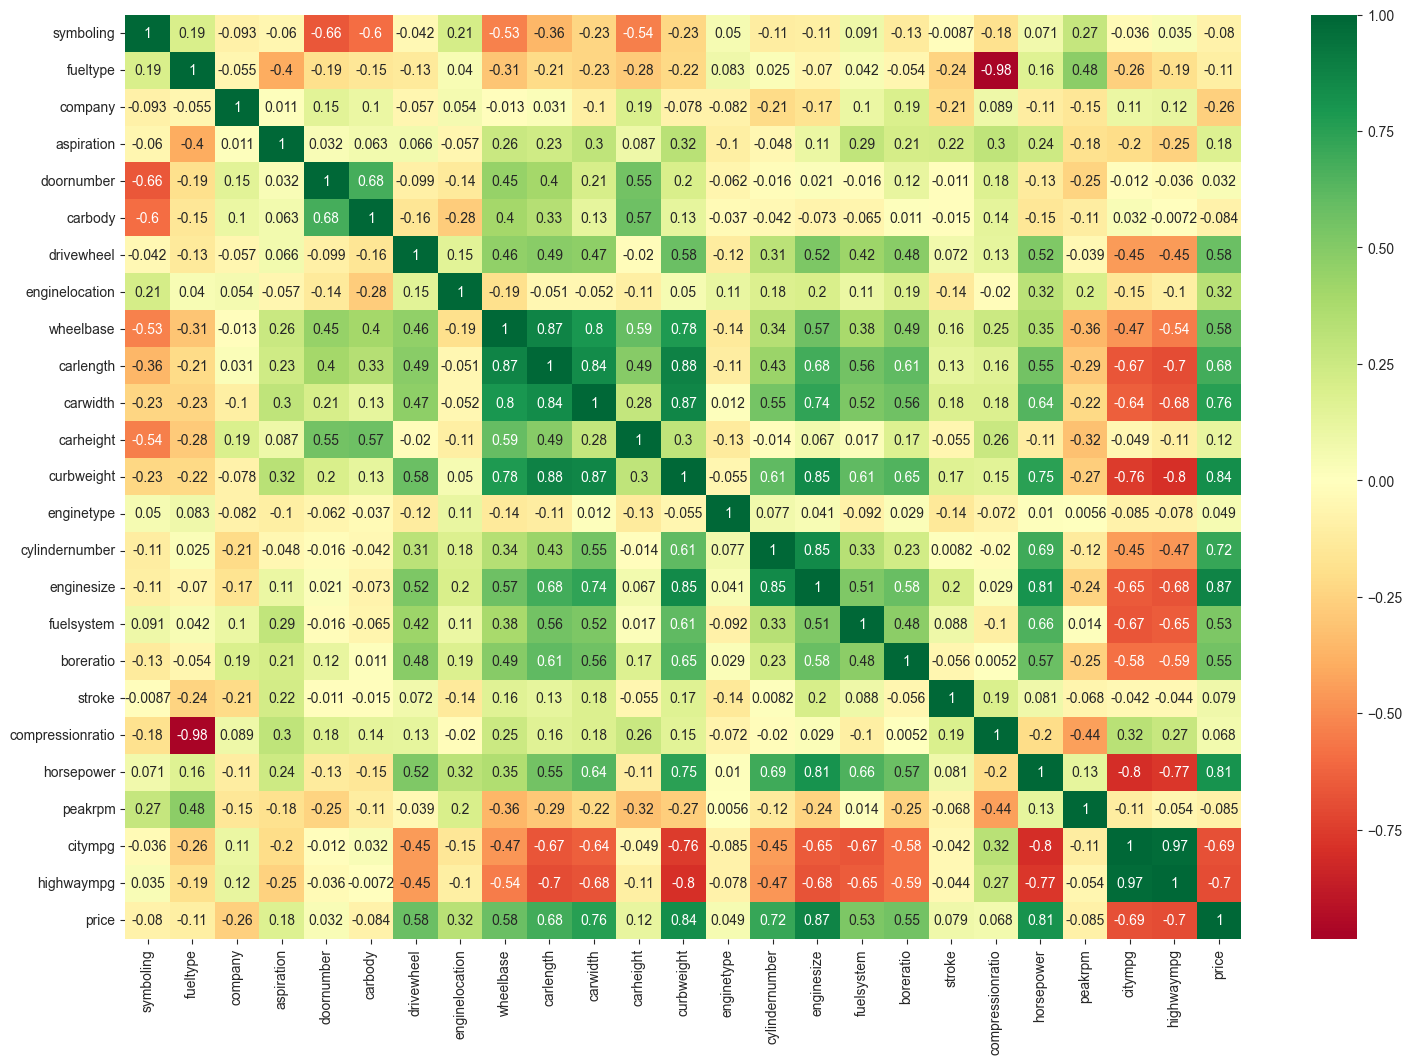

In [1462]:
sns.heatmap(data.corr(), center=0, annot=True, cmap="RdYlGn")
fig = plt.gcf()
fig.set_size_inches(18, 12)

## Реализация алгоритмов градиентного спуска

In [1463]:
class LinearRegression(RegressorMixin, LinearModel):
    def __init__(self, alpha = 1, max_iter = 1000, tol = 1e-6):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        
    def batch(self, X, y):
        return X, y
    
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]
        
        weight = np.zeros(X.shape[1])
        for i in range(1, self.max_iter):
            X_batch, y_batch = self.batch(X, y)
            y_predicted = X_batch @ weight
            grad = (2 / X_batch.shape[0]) * X_batch.T @ (y_predicted - y_batch) + 2 * self.alpha * np.pad(weight[:-1], (0, 1))
            weight -= grad / i
            if np.linalg.norm(grad) < self.tol:
                break

        self.coef_ = weight[:-1]
        self.intercept_ = weight[-1]
        return self

class LinearRegressionSGD(LinearRegression):
    def __init__(self, alpha = 1, max_iter = 1000, tol = 1e-6, random_state = 69):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.random_state = random_state
        self.random_state_ = check_random_state(random_state)

    def batch(self, X, y):
        idx = self.random_state_.randint(len(X), size=1)
        return X[idx, :], y.iloc[idx]

class LinearRegressionMBGD(LinearRegression):
    def __init__(self, alpha = 1, batch_size = 0.1, max_iter = 1000, tol = 1e-6, random_state = 69):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.batch_size = batch_size
        self.random_state = random_state
        self.random_state_ = check_random_state(random_state)

    def batch(self, X, y):
        size = ceil(len(X) * self.batch_size)
        idx = self.random_state_.randint(len(X), size=size)
        return X[idx, :], y.iloc[idx]

## Recursive Feature Elimination (RFE)

### Масштабирование данных

In [1464]:
y = data['price']
X = data.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Выберем наилучшее подмножество признаков с помощью RFE, а остальные удалим

In [1465]:
rfecv = RFECV(Ridge(), cv=10)
rfecv.fit(X_train, y_train)

features = X.columns[rfecv.support_]
for feature in features:
    print(feature)
X = X[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

fueltype
company
enginelocation
carwidth
curbweight
enginesize
compressionratio
horsepower


## Обучение

In [1466]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

results = []

pd.options.display.float_format = '{:,.2f}'.format

def train(estimator, name):
    estimator.fit(X_train, y_train)

    pred = estimator.predict(X_train)
    mse_train = mean_squared_error(y_train, pred)
    rmse_train = mean_squared_error(y_train, pred, squared=False)
    r2_train = r2_score(y_train, pred)

    pred = estimator.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    rmse_test = mean_squared_error(y_test, pred, squared=False)
    r2_test = r2_score(y_test, pred)

    results.append([name, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test])
    
def cross_validate(estimator):
    n_folds = 5

    cv_results = sklearn.model_selection.cross_validate(
        Pipeline([
            ('scaler', MinMaxScaler()),
            ('estimator', estimator)
        ]),
        X,
        y,
        cv=n_folds,
        scoring=['r2', 'neg_root_mean_squared_error', "neg_mean_squared_error"],
        return_train_score=True
    )
    df = pd.DataFrame()

    for metric_name, name in [
        ("neg_mean_squared_error", "MSE"),
        ("neg_root_mean_squared_error", "RMSE"),
        ("r2", "R2")
    ]:
        df[f"{name}(train)"] = abs(cv_results[f"train_{metric_name}"])
        df[f"{name}(test)"] = abs(cv_results[f"test_{metric_name}"])
        
    df = df.transpose()

    df.columns = [f"Fold{i + 1}" for i in range(n_folds)]

    return df.transpose()
    

In [1467]:
train(Ridge(), "Ridge")
train(LinearRegression(), "Градиентный спуск")
train(LinearRegressionSGD(), "Стохастический ГС")
train(LinearRegressionMBGD(), "Мини-пакетный ГС")

In [1468]:
pd.DataFrame(
    results,
    columns=["Estimator", "MSE train", "MSE test", "RMSE train", "RMSE test", "R2 train", "R2 test"]
).set_index("Estimator")

,MSE train,MSE test,RMSE train,RMSE test,R2 train,R2 test
Estimator,,,,,,
Ridge,"6,523,500.61","12,329,823.99","2,554.11","3,511.38",0.89,0.84
Градиентный спуск,"10,296,588.40","18,576,140.15","3,208.83","4,310.00",0.83,0.76
Стохастический ГС,"13,539,876.15","23,321,110.86","3,679.66","4,829.19",0.77,0.70
Мини-пакетный ГС,"10,266,125.88","18,536,405.29","3,204.08","4,305.39",0.83,0.77


### Обучение с кросс-валидацией

In [1469]:
cross_validate(Ridge())

,MSE(train),MSE(test),RMSE(train),RMSE(test),R2(train),R2(test)
Fold1,"6,773,816.24","14,478,863.93","2,602.66","3,805.11",0.89,0.80
Fold2,"7,786,466.93","12,377,321.45","2,790.42","3,518.14",0.82,0.90
Fold3,"6,992,024.47","13,945,511.69","2,644.24","3,734.37",0.91,0.25
Fold4,"8,822,117.50","21,381,715.25","2,970.20","4,624.04",0.86,0.66
Fold5,"8,443,574.04","6,490,532.70","2,905.78","2,547.65",0.89,0.64


In [1470]:
cross_validate(LinearRegression())

,MSE(train),MSE(test),RMSE(train),RMSE(test),R2(train),R2(test)
Fold1,"49,505,072.90","60,852,259.26","7,035.98","7,800.79",0.19,0.16
Fold2,"37,126,140.64","119,842,950.83","6,093.12","10,947.28",0.16,0.07
Fold3,"60,900,247.11","18,923,269.85","7,803.86","4,350.09",0.17,0.02
Fold4,"51,893,362.20","56,865,480.29","7,203.70","7,540.92",0.18,0.11
Fold5,"61,057,814.14","14,959,962.25","7,813.95","3,867.81",0.18,0.17


In [1471]:
cross_validate(LinearRegressionSGD())

,MSE(train),MSE(test),RMSE(train),RMSE(test),R2(train),R2(test)
Fold1,"48,243,238.01","58,812,008.03","6,945.74","7,668.90",0.21,0.19
Fold2,"36,939,351.59","117,678,367.65","6,077.78","10,847.97",0.16,0.09
Fold3,"61,051,213.88","16,208,993.55","7,813.53","4,026.04",0.17,0.13
Fold4,"53,223,923.19","56,550,032.36","7,295.47","7,519.98",0.16,0.11
Fold5,"63,054,534.17","16,094,656.83","7,940.69","4,011.81",0.16,0.11


In [1472]:
cross_validate(LinearRegressionMBGD())

,MSE(train),MSE(test),RMSE(train),RMSE(test),R2(train),R2(test)
Fold1,"49,570,116.32","60,948,220.67","7,040.60","7,806.93",0.19,0.16
Fold2,"36,991,294.23","119,260,354.91","6,082.05","10,920.64",0.16,0.08
Fold3,"60,621,288.13","19,589,810.54","7,785.97","4,426.04",0.18,0.05
Fold4,"51,559,216.34","56,754,973.04","7,180.47","7,533.59",0.18,0.11
Fold5,"60,631,667.07","14,954,201.18","7,786.63","3,867.07",0.19,0.17


## Вывод
Модели показывают среднюю точность по всем метрикам, предсказать цену будет возможно, но точность явно недостаточная. Скорее всего, основная проблема в малом размере датасета. Ridge из sklearn показал самые хорошие результаты, а самописные алгоритмы оказались кратно хуже и сравнимы друг с другом. При кросс-валидации видно, что различные разбиения лучше, а некоторые хуже, что тоже подтверждает версию с малым размером датасета.